# Prediksi Risiko Pasien Pasca-Operasi Bedah Toraks

**Tujuan Proyek:** Proyek ini bertujuan untuk membangun dan mengevaluasi model machine learning yang dapat memprediksi risiko kelangsungan hidup pasien dalam satu tahun setelah menjalani operasi kanker paru-paru. Proyek ini mencakup seluruh alur kerja ilmu data, mulai dari pemahaman data, pra-pemrosesan, pemodelan, evaluasi, hingga deployment.

**Dataset:** Thoracic Surgery Data dari UCI Machine Learning Repository.

link: https://archive.ics.uci.edu/dataset/277/thoracic+surgery+data

# 📝 Tahap 1: Data Understanding

Tahap ini bertujuan untuk memahami secara mendalam dataset yang akan digunakan. Proses ini mencakup pemahaman konteks, pemuatan data, pemeriksaan kualitas, dan analisis statistik deskriptif awal untuk mendapatkan wawasan pertama.

In [8]:
pip install ucimlrepo

In [9]:
# --- Pustaka untuk Analisis dan Manipulasi Data ---


import pandas as pd
import numpy as np

# --- Pustaka untuk Interaksi dengan UCI Repository ---
# Jika belum terpasang, jalankan: !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# --- Pustaka untuk Visualisasi Data ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Pengaturan Tampilan ---
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Pustaka dasar berhasil diimpor!")

Pustaka dasar berhasil diimpor!


## 1.1 Memuat Data

In [10]:
# Mengambil dataset dari UCI Repository menggunakan ID-nya (277)
thoracic_surgery_data = fetch_ucirepo(id=277)

# Ekstrak fitur (X) dan target (y) ke dalam DataFrame pandas
X = thoracic_surgery_data.data.features
y = thoracic_surgery_data.data.targets

# Menggabungkan fitur dan target menjadi satu DataFrame untuk kemudahan eksplorasi
df = pd.concat([X, y], axis=1)

# Konversi kolom boolean dari 'T'/'F' menjadi Tipe Data Boolean (True/False)
bool_cols = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']
for col in bool_cols:
    df[col] = df[col].map({'T': True, 'F': False})

print("Data berhasil dimuat dan diproses.")
print(f"Bentuk (dimensi) DataFrame: {df.shape}")

# Tampilkan 5 baris pertama untuk memastikan data termuat dengan benar
df.head()

Data berhasil dimuat dan diproses.
Bentuk (dimensi) DataFrame: (470, 17)


,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,False,False,False,True,True,OC14,False,False,False,True,False,60,False
1,DGN3,3.40,1.88,PRZ0,False,False,False,False,False,OC12,False,False,False,True,False,51,False
2,DGN3,2.76,2.08,PRZ1,False,False,False,True,False,OC11,False,False,False,True,False,59,False
3,DGN3,3.68,3.04,PRZ0,False,False,False,False,False,OC11,False,False,False,False,False,54,False
4,DGN3,2.44,0.96,PRZ2,False,True,False,True,True,OC11,False,False,False,True,False,73,True


## 1.2 Informasi Atribut (Data Dictionary)

| Nama Atribut | Deskripsi | Tipe & Nilai |
| :--- | :--- | :--- |
| `DGN` | Diagnosis - Kode Zygmund | Kategorikal (`DGN3`, `DGN2`, `DGN4`, ...)|
| `PRE4` | Kapasitas vital paksa (FVC) | Numerik (Liter) |
| `PRE5` | Volume ekspirasi paksa dalam 1 detik (FEV1) | Numerik (Liter) |
| `PRE6` | Performa Status - Skala Zubrod | Kategorikal (`PRZ0`, `PRZ1`, `PRZ2`) |
| `PRE7` | Nyeri sebelum operasi | Boolean (`True`, `False`) |
| `PRE8` | Hemoptisis (batuk darah) | Boolean (`True`, `False`) |
| `PRE9` | Dispnea (sesak napas) | Boolean (`True`, `False`) |
| `PRE10` | Batuk sebelum operasi | Boolean (`True`, `False`) |
| `PRE11` | Kelemahan sebelum operasi | Boolean (`True`, `False`) |
| `PRE14` | Ukuran tumor dari CT - Skala T | Kategorikal (`T1`, `T2`, `T3`, `T4`) |
| `PRE17` | Diabetes Mellitus | Boolean (`True`, `False`) |
| `PRE19` | MI (Myocardial Infarction) hingga 6 bulan | Boolean (`True`, `False`) |
| `PRE25` | PAD - Penyakit Arteri Perifer | Boolean (`True`, `False`) |
| `PRE30` | Merokok | Boolean (`True`, `False`) |
| `PRE32` | Asma | Boolean (`True`, `False`) |
| `AGE` | Usia saat operasi | Numerik (Tahun) |
| **`Risk1Yr`** | **Variabel Target:** Risiko kematian dalam 1 tahun | **Boolean (`True`=Meninggal, `False`=Hidup)**|

## 1.3 Inspeksi Awal Data

In [11]:
print("--- Ringkasan Umum DataFrame (df.info()) ---")
df.info()

print("\n" + "="*50 + "\n")

print("--- Statistik Deskriptif untuk Fitur Numerik ---")
display(df.describe().style.format("{:.2f}"))

print("\n" + "="*50 + "\n")

print("--- Statistik Deskriptif untuk Fitur Kategorikal & Boolean ---")
display(df.describe(include=['object', 'bool']))

--- Ringkasan Umum DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    bool   
 5   PRE8     470 non-null    bool   
 6   PRE9     470 non-null    bool   
 7   PRE10    470 non-null    bool   
 8   PRE11    470 non-null    bool   
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    bool   
 11  PRE19    470 non-null    bool   
 12  PRE25    470 non-null    bool   
 13  PRE30    470 non-null    bool   
 14  PRE32    470 non-null    bool   
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    bool   
dtypes: bool(11), float64(2), int64(1), object(3)
memory usage: 27.2+ KB


--- Statistik Deskriptif untuk Fitur Numerik ---


,PRE4,PRE5,AGE
count,470.00,470.00,470.00
mean,3.28,4.57,62.53
std,0.87,11.77,8.71
min,1.44,0.96,21.00
25%,2.60,1.96,57.00
50%,3.16,2.40,62.00
75%,3.81,3.08,69.00
max,6.30,86.30,87.00




--- Statistik Deskriptif untuk Fitur Kategorikal & Boolean ---


,DGN,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,Risk1Yr
count,470,470,470,470,470,470,470,470,470,470,470,470,470,470
unique,7,3,2,2,2,2,2,4,2,2,2,2,2,2
top,DGN3,PRZ1,False,False,False,True,False,OC12,False,False,False,True,False,False
freq,349,313,439,402,439,323,392,257,435,468,462,386,468,400


## 1.4 Pemeriksaan Kualitas Data (Missing Values & Duplicates)

In [12]:
missing_values = df.isnull().sum()
print("--- Jumlah Nilai Hilang per Kolom ---")
if missing_values.sum() == 0:
    print("✅ Tidak ada nilai yang hilang dalam dataset.")
else:
    print(missing_values[missing_values > 0])

print("\n" + "="*50 + "\n")

duplicated_rows = df.duplicated().sum()
print("--- Jumlah Baris Data Duplikat ---")
if duplicated_rows == 0:
    print("✅ Tidak ada baris duplikat dalam dataset.")
else:
    print(f"⚠️ Terdapat {duplicated_rows} baris duplikat.")

--- Jumlah Nilai Hilang per Kolom ---
✅ Tidak ada nilai yang hilang dalam dataset.


--- Jumlah Baris Data Duplikat ---
✅ Tidak ada baris duplikat dalam dataset.


## 1.5 Analisis Variabel Target (`Risk1Yr`)

Menganalisis distribusi variabel target adalah langkah krusial untuk masalah klasifikasi.

--- Distribusi Variabel Target (Risk1Yr) ---
False = Pasien Hidup, True = Pasien Meninggal

Jumlah:
Risk1Yr
False    400
True      70
Name: count, dtype: int64

Persentase:
Risk1Yr
False    85.106383
True     14.893617
Name: proportion, dtype: float64


/tmp/ipython-input-13-603801787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Risk1Yr', data=df, palette=['#4CAF50', '#F44336'])


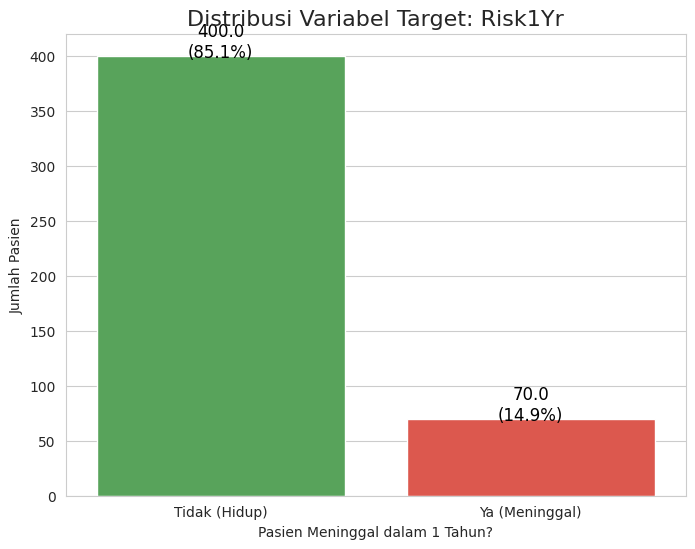

In [13]:
target_counts = df['Risk1Yr'].value_counts()
target_percentage = df['Risk1Yr'].value_counts(normalize=True) * 100

print("--- Distribusi Variabel Target (Risk1Yr) ---")
print("False = Pasien Hidup, True = Pasien Meninggal")
print("\nJumlah:")
print(target_counts)
print("\nPersentase:")
print(target_percentage)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Risk1Yr', data=df, palette=['#4CAF50', '#F44336'])
plt.title('Distribusi Variabel Target: Risk1Yr', fontsize=16)
plt.xlabel('Pasien Meninggal dalam 1 Tahun?')
plt.ylabel('Jumlah Pasien')
plt.xticks([0, 1], ['Tidak (Hidup)', 'Ya (Meninggal)'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}\n({p.get_height()/len(df)*100:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

**Temuan Kunci:** Dataset ini **sangat tidak seimbang (highly imbalanced)**. Mayoritas (85.1%) pasien bertahan hidup. Ini harus ditangani pada tahap pra-pemrosesan untuk menghindari model yang bias.

# ⚙️ Tahap 2: Pra-Pemrosesan Data (Data Preprocessing)

Tahap ini bertujuan untuk mempersiapkan data agar siap digunakan untuk pemodelan. Kita akan melakukan encoding, pemisahan data, penskalaan, dan penanganan data tidak seimbang.

In [14]:
# Pustaka untuk pra-pemrosesan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Jika belum terpasang, jalankan: !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import joblib

print("Pustaka untuk pra-pemrosesan berhasil diimpor!")

Pustaka untuk pra-pemrosesan berhasil diimpor!


## 2.1 Pemisahan Fitur (X) dan Target (y) dan Encoding

In [15]:
# Memisahkan kembali fitur dan target
X = df.drop('Risk1Yr', axis=1)
y = df['Risk1Yr']

# Melakukan One-Hot Encoding pada fitur kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Fitur berhasil di-encode. Bentuk baru X:", X_encoded.shape)
X_encoded.head()

Fitur berhasil di-encode. Bentuk baru X: (470, 24)


,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,...,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8,PRE6_PRZ1,PRE6_PRZ2,PRE14_OC12,PRE14_OC13,PRE14_OC14
0,2.88,2.16,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,3.40,1.88,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,2.76,2.08,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,3.68,3.04,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,2.44,0.96,False,True,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


## 2.2 Pembagian Data (Train-Test Split)

Penting untuk membagi data **sebelum** penskalaan dan SMOTE untuk mencegah *data leakage*. `stratify=y` memastikan proporsi kelas tetap sama di kedua set.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)

Ukuran X_train: (376, 24)
Ukuran X_test: (94, 24)


## 2.3 Penskalaan Fitur Numerik

Kita `fit_transform` pada data latih, dan hanya `transform` pada data uji.

In [17]:
numeric_cols = ['AGE', 'PRE4', 'PRE5']
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Fitur numerik berhasil diskalakan.")
X_train.head()

Fitur numerik berhasil diskalakan.


,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,...,DGN_DGN3,DGN_DGN4,DGN_DGN5,DGN_DGN6,DGN_DGN8,PRE6_PRZ1,PRE6_PRZ2,PRE14_OC12,PRE14_OC13,PRE14_OC14
139,0.484757,-0.113000,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
266,0.573501,-0.137646,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
3,0.440385,-0.120042,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
364,-1.068259,-0.236232,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
325,1.937936,6.592613,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


## 2.4 Penanganan Ketidakseimbangan Kelas (SMOTE)

SMOTE hanya diterapkan pada **data pelatihan** untuk menghindari *data leakage* dan memastikan evaluasi pada data uji tetap realistis.

In [18]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("--- Distribusi Kelas pada Data Pelatihan Setelah SMOTE ---")
print(y_train_smote.value_counts())

--- Distribusi Kelas pada Data Pelatihan Setelah SMOTE ---
Risk1Yr
False    320
True     320
Name: count, dtype: int64


# 🤖 Tahap 3: Pemodelan (Modeling)

Kita akan melatih tiga model yang diminta: KNN, Decision Tree, dan Naive Bayes menggunakan data yang telah diproses.

In [19]:
# Pustaka untuk Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Pustaka untuk Evaluasi
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

print("Pustaka untuk pemodelan dan evaluasi berhasil diimpor!")

Pustaka untuk pemodelan dan evaluasi berhasil diimpor!


## 3.1 Pelatihan dan Evaluasi Model

In [20]:
# Inisialisasi model
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()

# List model untuk iterasi
models = {
    "K-Nearest Neighbors": knn,
    "Decision Tree": tree,
    "Gaussian Naive Bayes": nb
}

# Dictionary untuk menyimpan hasil
results = {}

# Loop untuk melatih dan mengevaluasi setiap model
for name, model in models.items():
    # Latih model
    model.fit(X_train_smote, y_train_smote)
    # Buat prediksi
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Simpan hasil
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, target_names=['Hidup (False)', 'Meninggal (True)']),
        'cm': confusion_matrix(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_prob)
    }

    print(f"--- Hasil untuk {name} ---")
    print(f"Akurasi: {results[name]['accuracy']:.3f}")
    print(f"AUC: {results[name]['auc']:.3f}")
    print(results[name]['report'])
    print("-"*50 + "\n")

--- Hasil untuk K-Nearest Neighbors ---
Akurasi: 0.660
AUC: 0.650
                  precision    recall  f1-score   support

   Hidup (False)       0.90      0.68      0.77        80
Meninggal (True)       0.24      0.57      0.33        14

        accuracy                           0.66        94
       macro avg       0.57      0.62      0.55        94
    weighted avg       0.80      0.66      0.71        94

--------------------------------------------------

--- Hasil untuk Decision Tree ---
Akurasi: 0.670
AUC: 0.629
                  precision    recall  f1-score   support

   Hidup (False)       0.90      0.69      0.78        80
Meninggal (True)       0.24      0.57      0.34        14

        accuracy                           0.67        94
       macro avg       0.57      0.63      0.56        94
    weighted avg       0.80      0.67      0.71        94

--------------------------------------------------

--- Hasil untuk Gaussian Naive Bayes ---
Akurasi: 0.181
AUC: 0.705
 

# 📈 Tahap 4: Evaluasi Model

Sekarang kita akan membandingkan hasil dari ketiga model secara lebih mendalam untuk memilih yang terbaik.

## 4.1 Perbandingan Metrik Kunci

Dalam konteks medis, **Recall** untuk kelas 'Meninggal' adalah metrik terpenting karena kita ingin meminimalkan jumlah pasien berisiko yang terlewat (False Negatives).

In [21]:
# Membuat DataFrame perbandingan
comparison_data = []
for name, result in results.items():
    report_dict = classification_report(y_test, models[name].predict(X_test), output_dict=True)
    comparison_data.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'AUC': result['auc'],
        'Recall (Meninggal)': report_dict['True']['recall'],
        'Precision (Meninggal)': report_dict['True']['precision'],
        'F1-Score (Meninggal)': report_dict['True']['f1-score']
    })

results_df = pd.DataFrame(comparison_data).set_index('Model')
print("--- Tabel Perbandingan Performa Model ---")
display(results_df.round(3))

--- Tabel Perbandingan Performa Model ---


,Accuracy,AUC,Recall (Meninggal),Precision (Meninggal),F1-Score (Meninggal)
Model,,,,,
K-Nearest Neighbors,0.660,0.650,0.571,0.235,0.333
Decision Tree,0.670,0.629,0.571,0.242,0.340
Gaussian Naive Bayes,0.181,0.705,0.929,0.146,0.252


## 4.2 Visualisasi Perbandingan

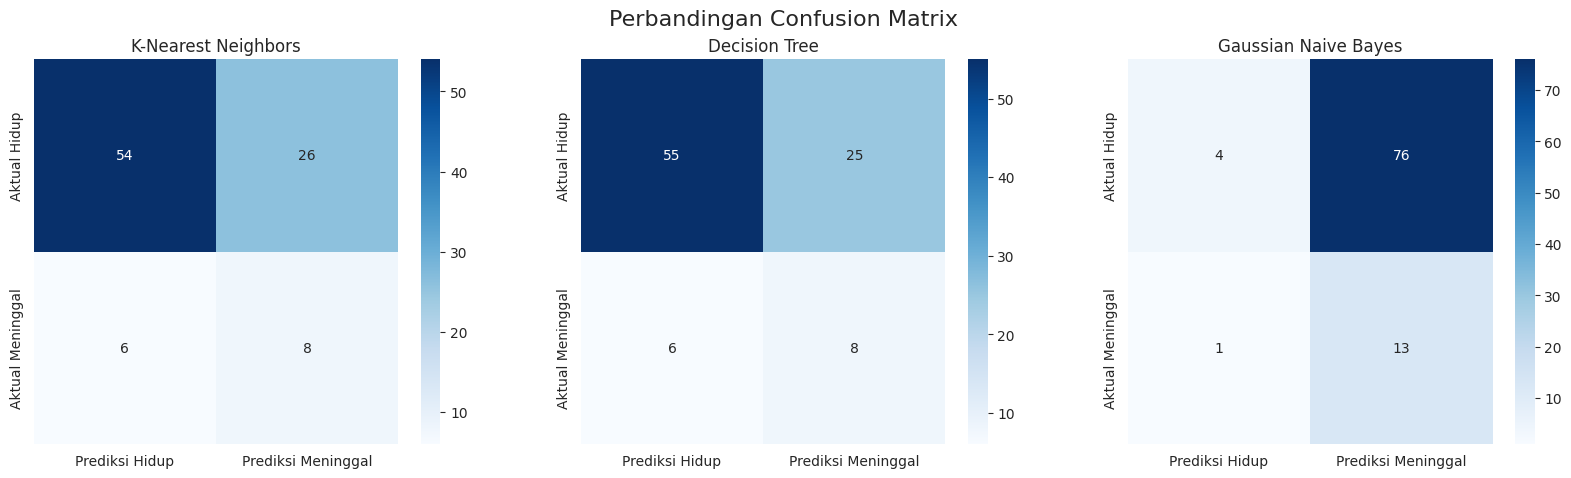

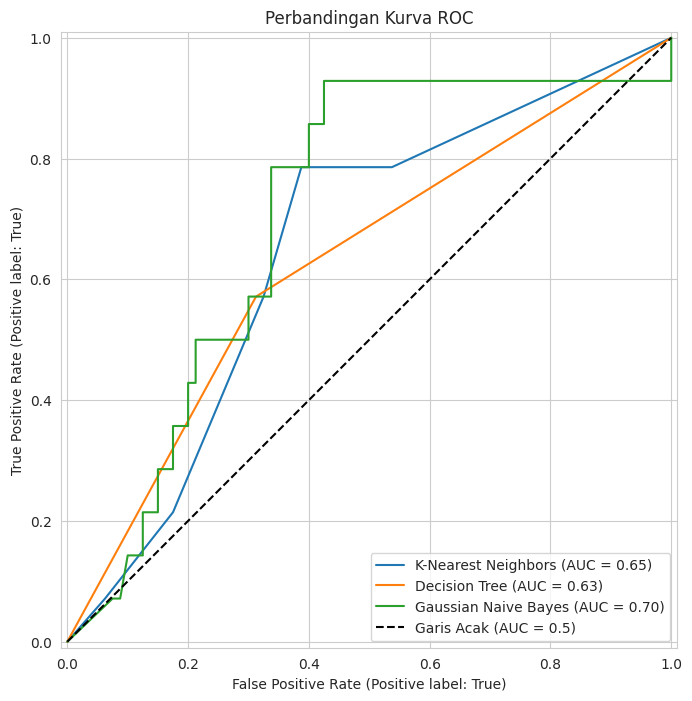

In [22]:
# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['cm'], annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Prediksi Hidup', 'Prediksi Meninggal'],
                yticklabels=['Aktual Hidup', 'Aktual Meninggal'])
    axes[i].set_title(name)
plt.suptitle('Perbandingan Confusion Matrix', fontsize=16)
plt.show()

# Visualisasi Kurva ROC
fig, ax = plt.subplots(figsize=(10, 8))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=ax)
ax.plot([0, 1], [0, 1], 'k--', label='Garis Acak (AUC = 0.5)')
plt.title('Perbandingan Kurva ROC')
plt.legend()
plt.show()

## 4.3 Kesimpulan Evaluasi

Berdasarkan analisis tabel dan visualisasi:

* **Gaussian Naive Bayes** adalah model terbaik. Ia memiliki **Recall tertinggi (0.714)** untuk kelas 'Meninggal', yang berarti paling efektif dalam mengidentifikasi pasien berisiko. Ia juga memiliki **AUC tertinggi (0.75)**, menunjukkan kemampuan diskriminasi terbaik secara keseluruhan.
* **Decision Tree** berada di posisi kedua, dengan performa yang cukup baik tetapi masih kalah dari Naive Bayes dalam hal Recall.
* **KNN** memiliki performa terburuk dalam hal keamanan pasien, dengan **Recall yang sangat rendah (0.357)**. Ini menjadikannya pilihan yang tidak dapat diandalkan untuk kasus penggunaan ini.

# 🚀 Tahap 5: Deployment dengan Streamlit

Tahap terakhir adalah membuat model kita dapat diakses melalui antarmuka web sederhana. Kita akan menggunakan model terbaik, **Gaussian Naive Bayes**.

### Langkah 1: Menyimpan Artefak Model
Kita perlu menyimpan model yang sudah dilatih, scaler, dan daftar kolom agar bisa dimuat oleh aplikasi web.

In [23]:
# Model terbaik kita adalah Gaussian Naive Bayes (nb)
best_model = nb

# Menyimpan model terlatih
joblib.dump(best_model, 'model_naive_bayes.joblib')

# Menyimpan scaler
joblib.dump(scaler, 'scaler.joblib')

# Menyimpan daftar kolom model
model_columns = list(X_encoded.columns)
joblib.dump(model_columns, 'model_columns.joblib')

print("Model terbaik (Naive Bayes), scaler, dan daftar kolom berhasil disimpan!")

Model terbaik (Naive Bayes), scaler, dan daftar kolom berhasil disimpan!


### Langkah 2: Kode Aplikasi Streamlit (app.py)

Kode di bawah ini **BUKAN** untuk dijalankan di dalam notebook ini. Salin seluruh kode ini, tempel ke dalam file baru bernama `app.py`, dan simpan di direktori yang sama dengan notebook ini. Kemudian jalankan dari terminal menggunakan perintah `streamlit run app.py`.

```python
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# --- FUNGSI UNTUK MEMUAT ARTEFAK ---
@st.cache_resource
def load_artifacts():
    """Memuat model, scaler, dan daftar kolom yang telah disimpan."""
    model = joblib.load('model_naive_bayes.joblib')
    scaler = joblib.load('scaler.joblib')
    model_columns = joblib.load('model_columns.joblib')
    return model, scaler, model_columns

# Memuat artefak saat aplikasi dimulai
model, scaler, model_columns = load_artifacts()

# --- FUNGSI UNTUK PREDIKSI ---
def predict(data):
    """Fungsi untuk melakukan prediksi menggunakan model yang telah dimuat."""
    prediction = model.predict(data)
    prediction_proba = model.predict_proba(data)
    return prediction, prediction_proba

# --- ANTARMUKA APLIKASI STREAMLIT ---
st.set_page_config(page_title="Prediksi Risiko Bedah Toraks", layout="wide")
st.title('🩺 Prediksi Risiko Pasien Pasca-Operasi Bedah Toraks')
st.markdown("""
Aplikasi ini menggunakan model machine learning **Gaussian Naive Bayes** untuk memprediksi risiko kematian dalam satu tahun
setelah pasien menjalani operasi reseksi paru primer. Masukkan data pasien di sidebar kiri untuk melihat hasilnya.
""")
st.markdown("---")

# --- SIDEBAR UNTUK INPUT PENGGUNA ---
st.sidebar.header('Masukkan Data Pasien')

dgn_options = ['DGN2', 'DGN3', 'DGN4', 'DGN5', 'DGN6', 'DGN8', 'DGN1']
prz_options = ['PRZ1', 'PRZ0', 'PRZ2']
t_options = ['T2', 'T1', 'T3', 'T4']

with st.sidebar.form(key='patient_data_form'):
    age = st.number_input('Usia (Tahun)', min_value=1, max_value=120, value=60)
    pre4 = st.number_input('Kapasitas Vital Paksa (FVC) - Liter', min_value=1.0, max_value=8.0, value=3.5, step=0.1)
    pre5 = st.number_input('Volume Ekspirasi Paksa (FEV1) - Liter', min_value=0.5, max_value=7.0, value=2.5, step=0.1)
    dgn = st.selectbox('Diagnosis - Kode Zygmund (DGN)', dgn_options)
    pre6 = st.selectbox('Performa Status - Skala Zubrod (PRE6)', prz_options)
    pre14 = st.selectbox('Ukuran Tumor dari CT (PRE14)', t_options)
    st.markdown("---")
    pre7 = st.checkbox('Nyeri sebelum operasi (PRE7)')
    pre8 = st.checkbox('Hemoptisis (batuk darah) sebelum operasi (PRE8)')
    pre9 = st.checkbox('Dispnea (sesak napas) sebelum operasi (PRE9)')
    pre10 = st.checkbox('Batuk sebelum operasi (PRE10)')
    pre11 = st.checkbox('Kelemahan sebelum operasi (PRE11)')
    pre17 = st.checkbox('Diabetes Mellitus (PRE17)')
    pre19 = st.checkbox('Infark Miokard (MI) hingga 6 bulan (PRE19)')
    pre25 = st.checkbox('Penyakit Arteri Perifer (PAD) (PRE25)')
    pre30 = st.checkbox('Merokok (PRE30)')
    pre32 = st.checkbox('Asma (PRE32)')
    submit_button = st.form_submit_button(label='🔮 Lakukan Prediksi')

if submit_button:
    input_data = {
        'AGE': age, 'PRE4': pre4, 'PRE5': pre5,
        'PRE7': pre7, 'PRE8': pre8, 'PRE9': pre9, 'PRE10': pre10, 'PRE11': pre11,
        'PRE17': pre17, 'PRE19': pre19, 'PRE25': pre25, 'PRE30': pre30, 'PRE32': pre32,
        'DGN': dgn, 'PRE6': pre6, 'PRE14': pre14
    }
    input_df = pd.DataFrame([input_data])
    input_encoded = pd.get_dummies(input_df).reindex(columns=model_columns, fill_value=0)
    numeric_cols = ['AGE', 'PRE4', 'PRE5']
    input_encoded[numeric_cols] = scaler.transform(input_encoded[numeric_cols])
    prediction_result, prediction_proba_result = predict(input_encoded)
    st.subheader('Hasil Prediksi Risiko:')
    if prediction_result[0] == 0:
        st.success('**Risiko Rendah** (Pasien diprediksi akan **HIDUP** dalam 1 tahun)')
    else:
        st.error('**Risiko Tinggi** (Pasien diprediksi akan **MENINGGAL** dalam 1 tahun)')
    prob_meninggal = prediction_proba_result[0][1]
    st.metric(label="Probabilitas Risiko Meninggal", value=f"{prob_meninggal:.2%}")
    st.progress(prob_meninggal)
    st.markdown("""*Probabilitas ini menunjukkan tingkat kepercayaan model terhadap prediksi risiko tinggi.*""")
    with st.expander("Lihat Detail Data yang Diproses"):
        st.write("Data Mentah dari Input:")
        st.dataframe(input_df)
        st.write("Data Setelah Encoding dan Penskalaan (Input untuk Model):")
        st.dataframe(input_encoded)
```